Sahad Rafiuzzaman <br>
CYSE 635: AI Security and Privacy <br>
Dr. MD Morshed Alam <br>
October 3, 2024 <br>

Assignment 1: Supervised Learning Based Attack Classifier

#Task 1 (5 points):<br>
* Combine the datasets and perform some cleaning / preprocessing operations.
* Perform histogram and pie chart analysis to visually show how attack logs are distributed.

###Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Upload CSV files into Google Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving benign-log_radio_status_3.csv to benign-log_radio_status_3.csv
Saving jamming-log_radio_status_3.csv to jamming-log_radio_status_3.csv
Saving spoofing-hackrf-log_radio_status_3.csv to spoofing-hackrf-log_radio_status_3.csv


#### **Check the current working directory and files**

In [8]:
import os
curr_dir = os.getcwd()
print(curr_dir)
print(os.listdir(curr_dir))

/content
['.config', 'spoofing-hackrf-log_radio_status_3.csv', 'jamming-log_radio_status_3.csv', 'benign-log_radio_status_3.csv', 'sample_data']


#### **Read the CSV files**

In [ ]:
benign_logs = pd.read_csv('/content/benign_log.csv')
jamming_logs = pd.read_csv('/content/jamming_log.csv')
spoofing_logs = pd.read_csv('/content/spoofing_log.csv')

print(f'\n Benign_logs shape: {benign_logs.shape}')
print(f'\n Jamming_logs shape: {jamming_logs.shape}')
print(f'\n Spoofing_logs shape: {spoofing_logs.shape}')

print(f'\n Top 5 rows of Benign_logs: \n {benign_logs.head(5)}')
print(f'\n Top 5 rows of Jamming_logs columns: \n {jamming_logs.head(5)}')
print(f'\n Top 5 rows of Spoofing_logs columns: \n {spoofing_logs.head(5)}')


 Benign_logs shape: (247, 7)

 Jamming_logs shape: (223, 7)

 Spoofing_logs shape: (138, 7)

 Top 5 rows of Benign_logs: 
    timestamp  rssi  remote_rssi  txbuf  noise  remote_noise  attack
0  614850759   198          198    100     33            40       0
1  615898770   197          197     93     46            48       0
2  616815893   195          195     96     28            38       0
3  617852800   192          197    100     30            39       0
4  618908331   182          176     97     20            41       0

 Top 5 rows of Jamming_logs columns: 
    timestamp  rssi  remote_rssi  txbuf  noise  remote_noise  attack
0  332826769   176          171     97     38            29       1
1  333858763   171          178     97     30            33       1
2  334902756   175          176     97     30            38       1
3  335827765   182          182    100     32            38       1
4  336862004   185          183     96     26            35       1

 Top 5 rows of Spoo

### Perform Preprocessing

#### **Concatenate the datasets together**


In [10]:
df = pd.concat([benign_logs, jamming_logs, spoofing_logs], ignore_index=True)

print(f'\n Concatenated dataset shape: {df.shape}')
print(f'\n First 5 rows: \n {df.head(5)}')
print(f'\n Last 5 rows: \n {df.tail(5)}')


 Concatenated dataset shape: (608, 7)

 First 5 rows: 
    timestamp  rssi  remote_rssi  txbuf  noise  remote_noise  attack
0  614850759   198          198    100     33            40       0
1  615898770   197          197     93     46            48       0
2  616815893   195          195     96     28            38       0
3  617852800   192          197    100     30            39       0
4  618908331   182          176     97     20            41       0

 Last 5 rows: 
      timestamp  rssi  remote_rssi  txbuf  noise  remote_noise  attack
603  390804770   178          180     97     33            37       1
604  391840769   180          174    100     28            38       1
605  392894761   168          171     96     32            37       1
606  393812813   172          169     96     29            47       1
607  394842769   172          171     97     26            34       1


### **Attack Length**

In [48]:
atck = df['attack']
print(f'\n Attack Lenth: \n {len(atck)}')
print(f'\n Unique values in attack: \n {np.unique(atck)}')


 Attack Lenth: 
 608

 Unique values in attack: 
 [0. 1.]


#### **Get the column names**

In [11]:
col_name_list = list(df.columns)
print(f'\n Column names: {col_name_list}')
size_col_name_list = len(col_name_list)
print(f'\n Numbers of columns: {size_col_name_list}')


 Column names: ['timestamp', 'rssi', 'remote_rssi', 'txbuf', 'noise', 'remote_noise', 'attack']

 Numbers of columns: 7


#### **Import other libraries**

In [12]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

### **Perform Preprocessing**

In [13]:
labelencoder = LabelEncoder()
df['rssi'] = labelencoder.fit_transform(df['rssi'])
df['remote_rssi'] = labelencoder.fit_transform(df['remote_rssi'])
df['txbuf'] = labelencoder.fit_transform(df['txbuf'])
df['noise'] = labelencoder.fit_transform(df['noise'])
df['remote_noise'] = labelencoder.fit_transform(df['remote_noise'])

df['timestamp'] = df['timestamp'].replace(" ", 0).astype('float64')
df['timestamp'] = df['timestamp'].astype(float)

df['attack'] = df['attack'].replace(" ", 0).astype('float64')
df['attack'] = df['attack'].astype(float)

## Perform Exploratory Data Analysis

### *Histogram*

Histogram analysis: 


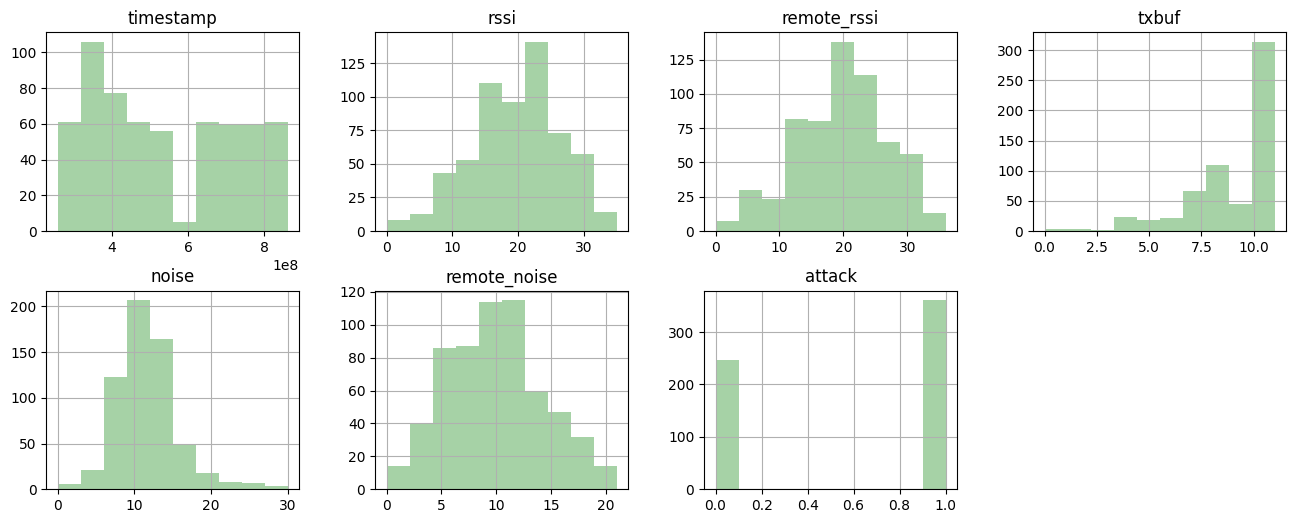

In [14]:
# histogram
print("Histogram analysis: ")
df.hist(figsize= (16,16),layout=(5,4), color="green", alpha = 0.35)
plt.show()

## *Pie Chart*

Pie chart of attack


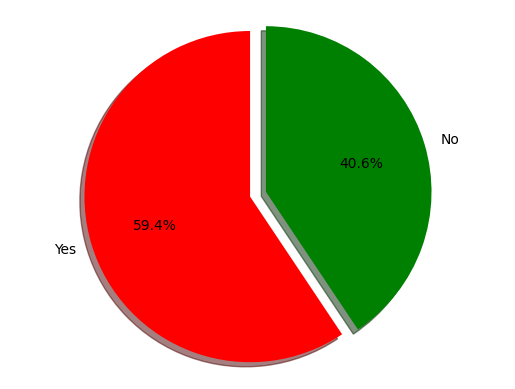

In [49]:
# pie chart
print ("Pie chart of attack")
sizes = df['attack'].value_counts(sort = True)
colors = ["red","green"]
labels = ["Yes", "No"]
explode = (0, 0.1)
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

#Task 2 (10 points):            

* Develop two AI models based on supervised learning to successfully categorize malicious logs from the benign ones (i.e., separating logs with attack = 1 from the logs with attack = 0).
* Compare the accuracy among the implemented AI models.

## Machine Learning Modeling

### **Import additional libraries**

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

### **Create `train` and `test` datasets**

In [37]:
# Preprocessing
X = df.drop(labels = ["attack"],axis = 1)
Y = df["attack"].values

# train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# Shapes
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

print("\n")

# Columns
print("X_train ", X_train)
print("\n")
print("X_test ", X_test)
print("\n")

print("y_train ", y_train)
print("\n")
print("y_test ", y_test)
print("\n")

X_train Shape:  (486, 6)
X_test Shape:  (122, 6)
y_train Shape:  (486,)
y_test Shape:  (122,)


X_train         timestamp  rssi  remote_rssi  txbuf  noise  remote_noise
324  409868758.0    27           26      8     12             1
561  348867806.0    15           15      9     20            13
118  732808778.0    21           20     11     12             8
295  380886843.0    26           21     11     12            11
588  375895179.0    17           19     11     14             8
..           ...   ...          ...    ...    ...           ...
75   689818766.0    16           15     11      7            12
599  386880821.0     6           11      4     10            14
575  362853768.0    10            6     11     13            17
337  422827057.0    13           13      7      8            11
523  310871838.0    12           14      8     13            11

[486 rows x 6 columns]


X_test         timestamp  rssi  remote_rssi  txbuf  noise  remote_noise
216  830895781.0    23       

### **K-nearest Neighbors (k-NN)**

In [38]:
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=79, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=79)

### **Model Evaluation for KNN**

In [39]:
y_pred_knn = knn.predict(X_test)
print(f'\n y_pred_knn: \n {y_pred_knn} \n')
print(f'\n y_test: \n {y_test}')


 y_pred_knn: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.] 


 y_test: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.]


### **Confusion Matrix for KNN**

In [40]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[55  0]
 [ 0 67]]


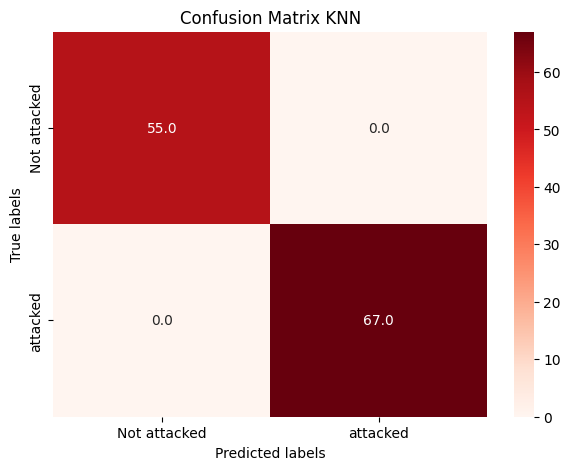

In [41]:
labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn,cmap="Reds",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix KNN');

plt.show()

## Logistic Regression

#### **Import additional Libraries**

In [86]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [78]:
cc = 10.0

lr1 = LogisticRegression(C=cc, random_state=0)
lr1.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0)

### **Model Evaluation for Logistic Regression**

In [80]:
y_pred_lr1 = lr1.predict(X_test)
print(f'\n y_pred_lr1: \n {y_pred_lr1} \n')
print(f'\n y_test: \n {y_test}')


 y_pred_lr1: 
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0.] 


 y_test: 
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0.]


### **Confusion Matrix for Logistic Regression**

In [65]:
cm_lr1 = confusion_matrix(y_test, y_pred_lr1)
print(cm_lr1)

[[55  0]
 [67  0]]


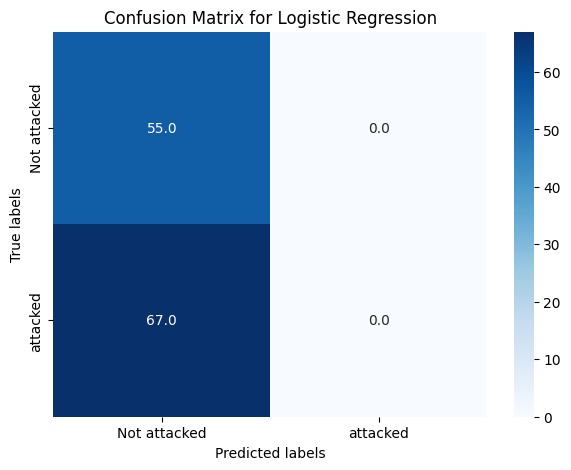

In [60]:
labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_lr1,cmap="Blues",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for Logistic Regression');

plt.show()

## Model 3: Support Vector Machine (SVM) Training


In [68]:
from sklearn.svm import SVC

svm1 = SVC(kernel='rbf', random_state=0, gamma=0.1, C=cc)
svm1.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1, random_state=0)

### **Model Evaluation for Support Vector Machine**

In [69]:
y_pred_svm1 = svm1.predict(X_test)
print(f'\n y_pred_svm1: \n {y_pred_svm1} \n')
print(f'\n y_test: \n {y_test}')


 y_pred_svm1: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] 


 y_test: 
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0.]


In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### **Confusion Matrix for Support Vector Machine**

In [70]:
cm_svm1 = confusion_matrix(y_test, y_pred_svm1)
print(cm_svm1)

[[ 0 55]
 [ 0 67]]


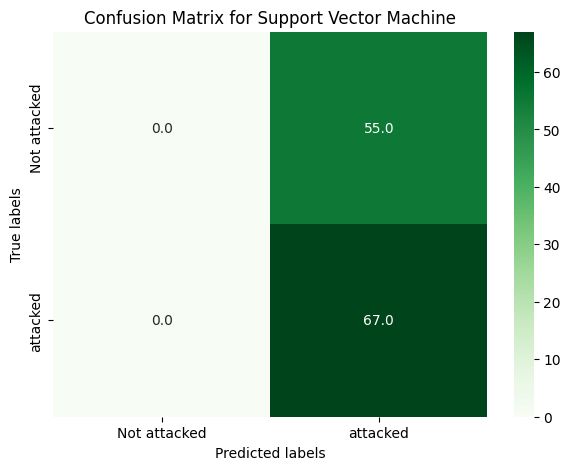

In [72]:
labels = ['Not attacked', 'attacked']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_svm1,cmap="Greens",annot=True,fmt='.1f', ax = ax);

# labels, title and ticks

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for Support Vector Machine');

plt.show()